## TELECOM CUSTOMER CHURN PREDICTION

### Importing the libraries for data loading,visualizition.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_csv('telco-customer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Manipulation

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [10]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df = df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Exploratory Data Analysis

In [14]:
df["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

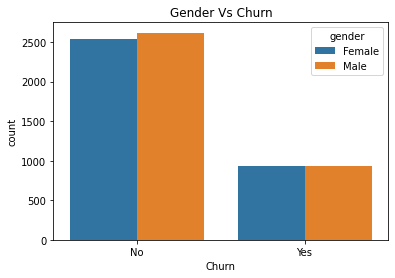

In [15]:
sns.countplot(data=df, x="Churn",hue="gender")
plt.title("Gender Vs Churn");

From the above graph, we can see that gender is not a contributing factor for customer churn in this data set as the numbers of both the genders, that have or haven’t churned, are almost the same.

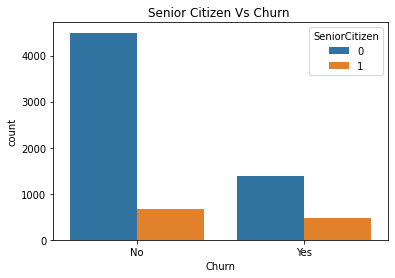

In [16]:
sns.countplot(data=df,x="Churn",hue="SeniorCitizen")
plt.title("Senior Citizen Vs Churn ");

the rate of churning is high among the non senior citizen



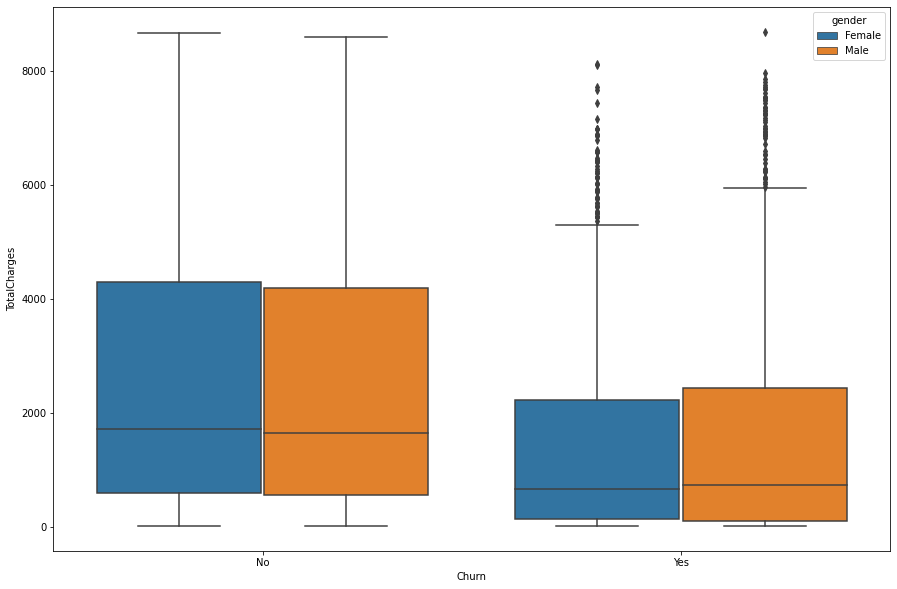

In [17]:
plt.figure(figsize=(15,10));
sns.boxplot(data=df,x="Churn",y="TotalCharges",hue="gender");

there is similar distribution of male and female and the people who have higher total charges are less likely to churn.

(array([0, 1, 2]),
 [Text(0, 0, 'Month-to-month'),
  Text(1, 0, 'One year'),
  Text(2, 0, 'Two year')])

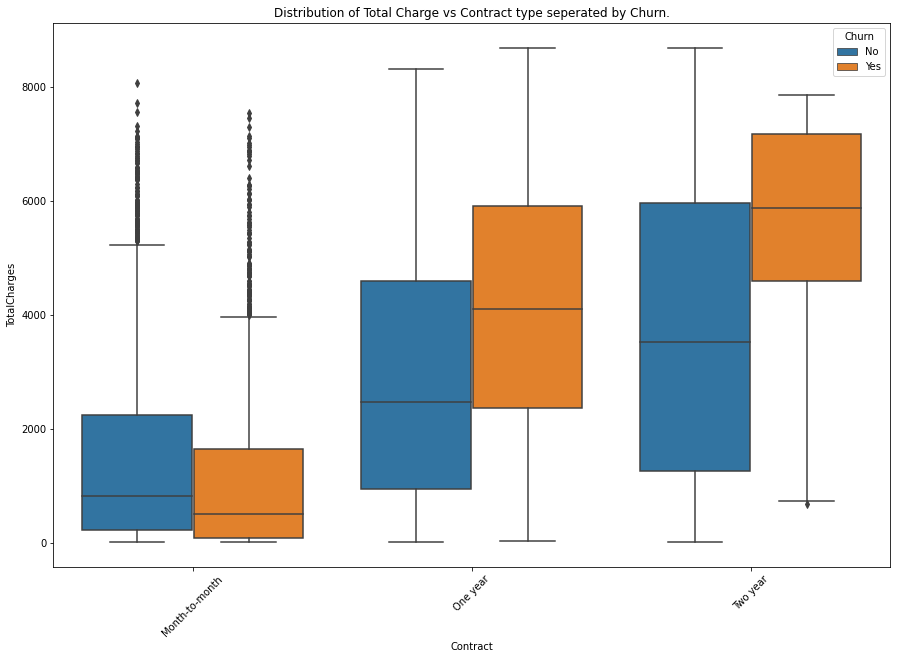

In [18]:
plt.figure(figsize=(15,10));
sns.boxplot(data=df,x="Contract",y="TotalCharges",hue="Churn")
plt.title("Distribution of Total Charge vs Contract type seperated by Churn.")
plt.xticks(rotation=45)

So,here people who have contract for more time and who paid more are likely to churn. We can reedem them by providing some offers after 1 year or 2 year completion

<AxesSubplot:xlabel='Churn', ylabel='count'>

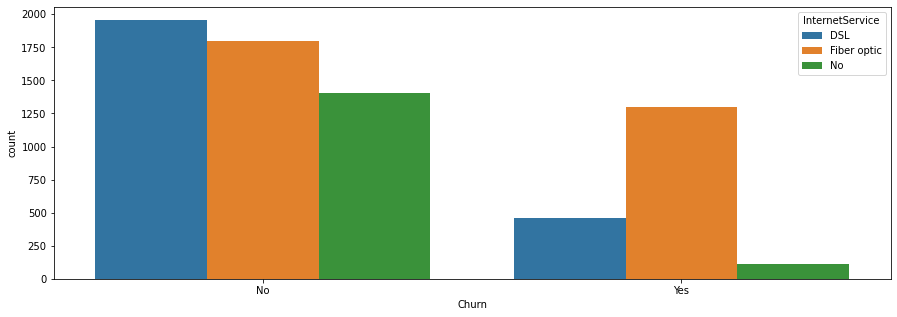

In [19]:
plt.figure(figsize=(15,5));
sns.countplot(x='Churn',data=df, hue='InternetService')

We can see that people using Fiber-optic services have a higher churn percentage. This shows that the company needs to improve their Fiber-optic service

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

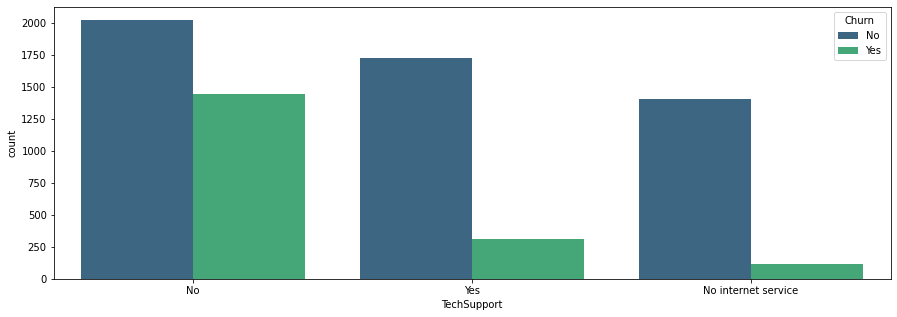

In [20]:
plt.figure(figsize=(15,5));
sns.countplot(x='TechSupport',data=df, hue='Churn',palette='viridis')

Those customers who don’t have tech support have churned more, which is pretty self-explanatory. This also highlights the fact that the tech support provided by the company is up to the mark.

### Correlation of features with churn

In [21]:
corr_df  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [22]:
corr_df.head()

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
SeniorCitizen,1.000000,0.001819,-0.001819,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,-0.136377,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
gender_Female,0.001819,1.000000,-1.000000,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,-0.004335,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-0.001819,-1.000000,1.000000,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,0.004335,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
Partner_No,-0.016957,-0.001379,0.001379,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,0.130028,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982
Partner_Yes,0.016957,0.001379,-0.001379,-1.000000,1.000000,-0.452269,0.452269,-0.018397,0.018397,-0.130028,...,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948,0.149982,-0.149982


In [23]:
corr_df["Churn_Yes"].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

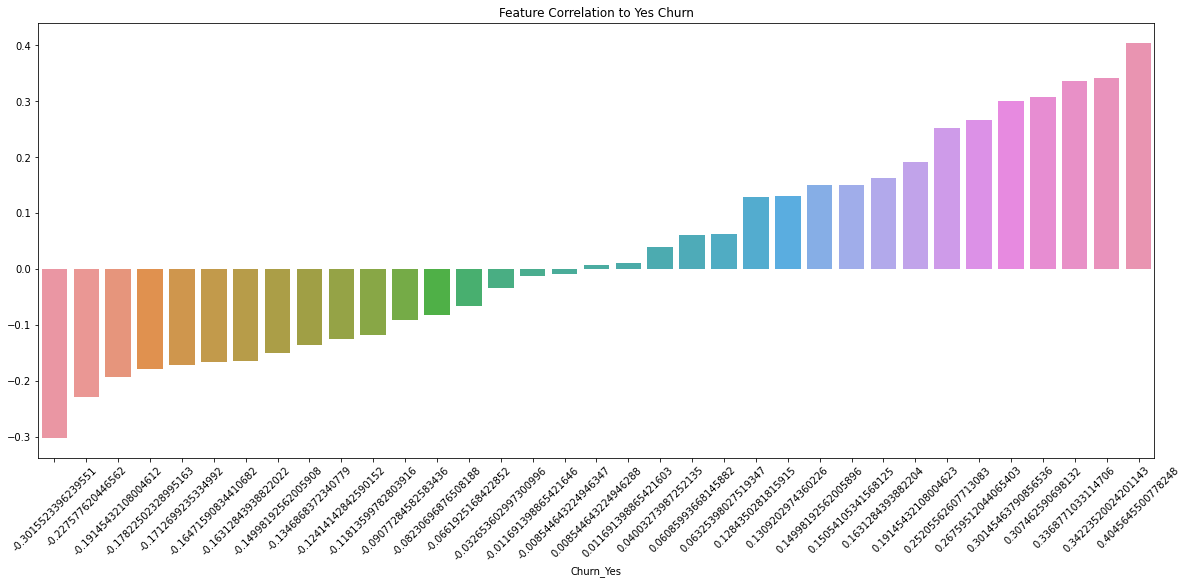

In [24]:
plt.figure(figsize=(20,8));

sns.barplot(data=corr_df["Churn_Yes"].sort_values().iloc[1:-1],x=corr_df["Churn_Yes"].sort_values().iloc[1:-1].index,y=corr_df["Churn_Yes"].sort_values().iloc[1:-1].values)
plt.xticks(rotation=45);
plt.title("Feature Correlation to Yes Churn");

### Churn Analysis

In [25]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

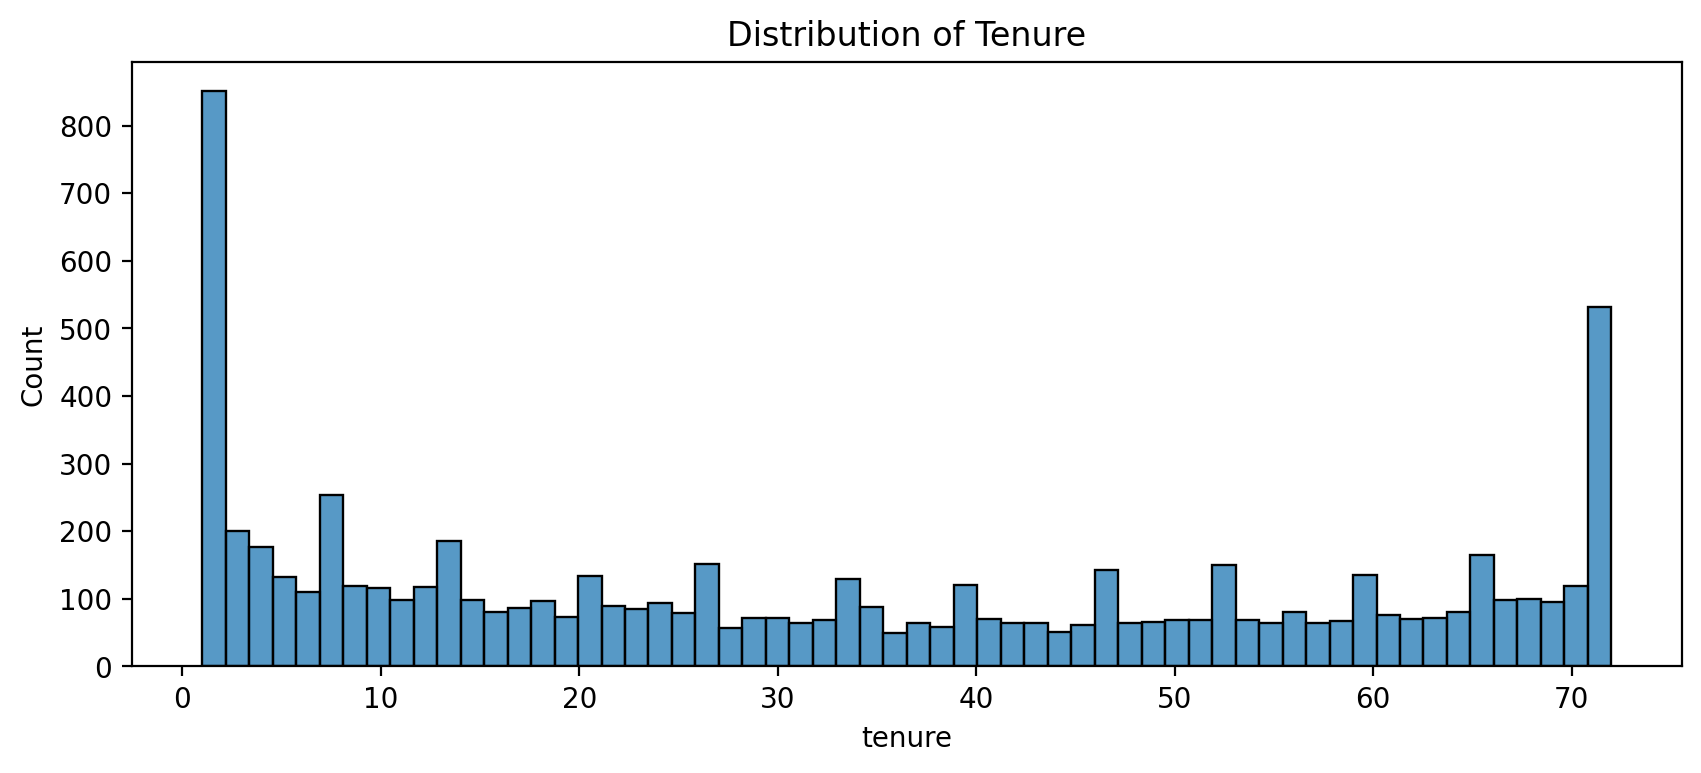

In [26]:
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60)
plt.title("Distribution of Tenure");

more people have 1 or 2 month tenure and then more number of people is of more than 2 years contract type.

So, here we can conclude that either customer need the service for short duration of time or a very long duration of time

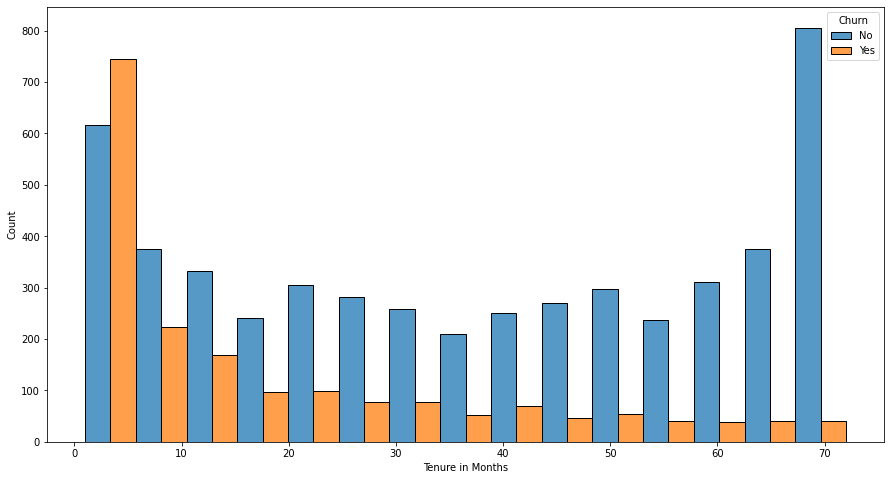

In [27]:
plt.figure(figsize=(15,8));

ax = sns.histplot(x = 'tenure', hue = 'Churn', data = df, multiple='dodge')
ax.set(xlabel="Tenure in Months", ylabel = "Count");

The churn amount is higher in the initial 5 months, which is usually the time when the new customers try out the service and decide whether to continue or cancel. This pretty much can be attributed to the uncertainty in the customer’s mind.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

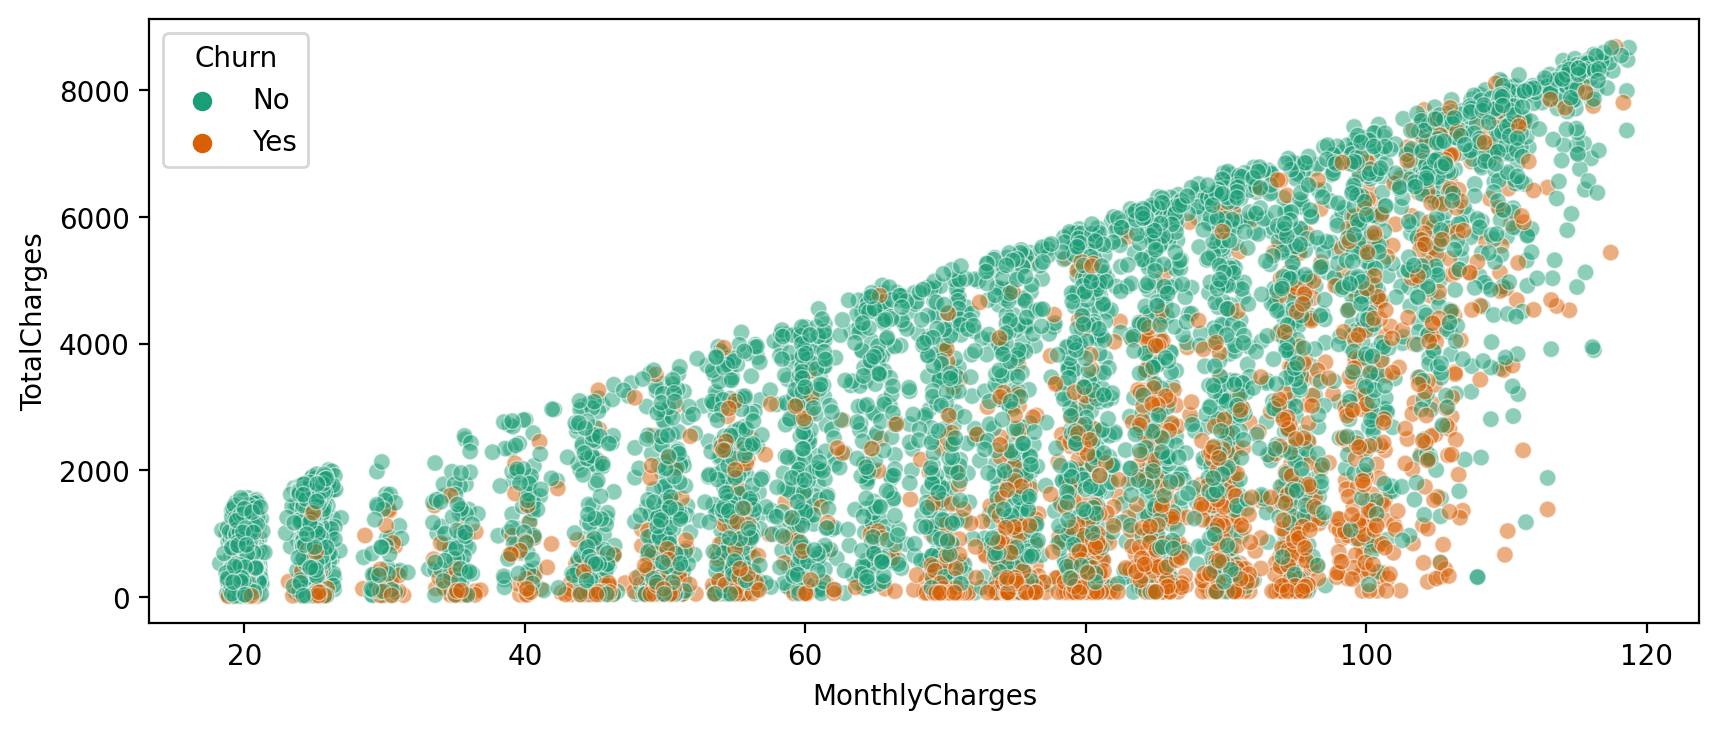

In [28]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

Here people who have more monthly charge instead of having lower total charge is more likely to churn.

### Churn rate of cusmtomer based on tenure month.

In [29]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']
no_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [30]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [31]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

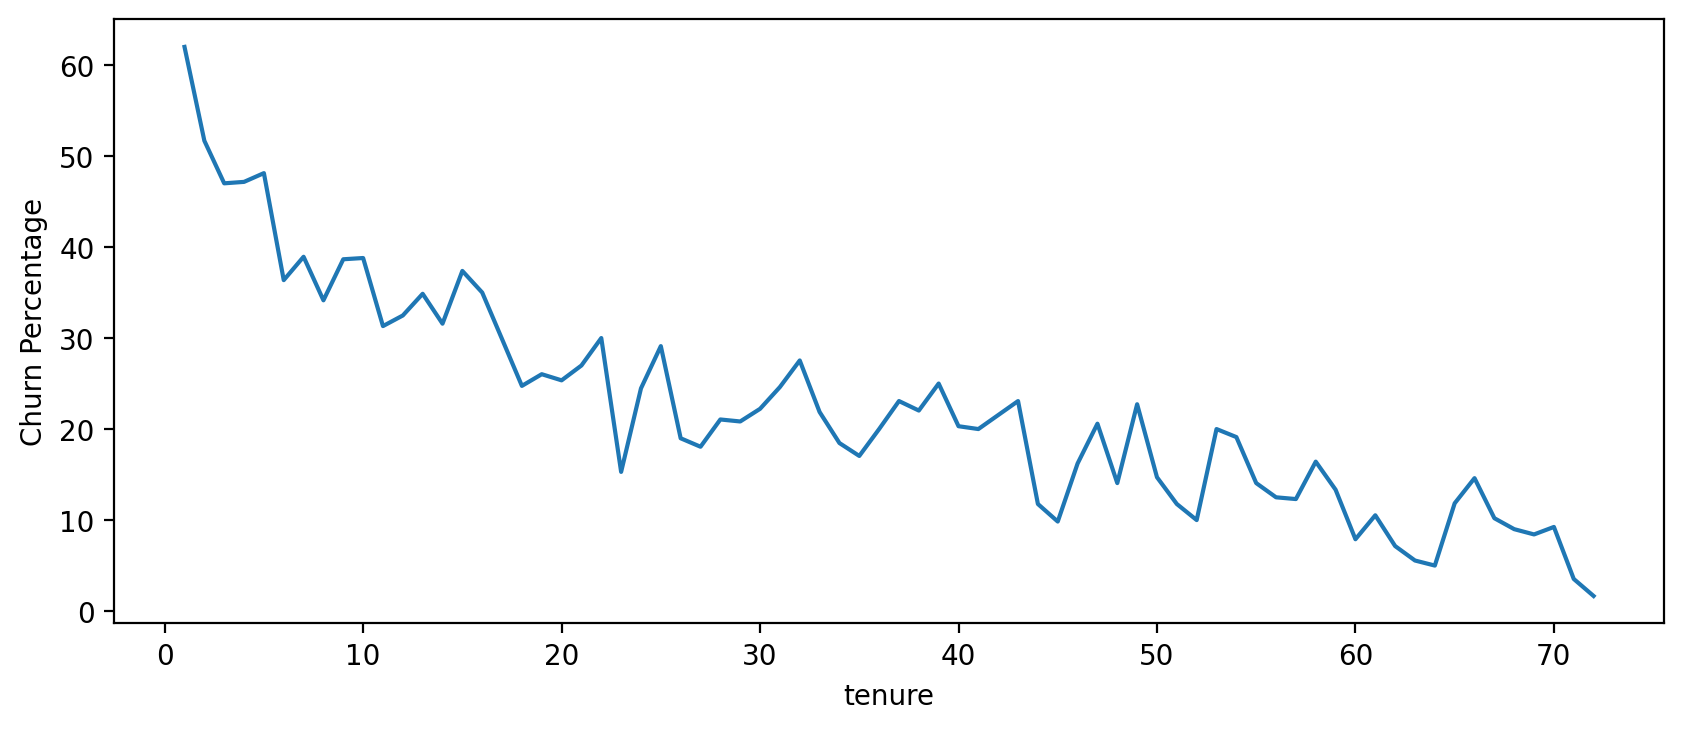

In [32]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

### Predictive Modeling

In [33]:
X = df.drop(['Churn','customerID'],axis=1)
X = pd.get_dummies(X,drop_first=True)

In [34]:
y = df['Churn']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Normalizing our feature since we are also going to use distance based model.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,accuracy_score

In [38]:
scaler = StandardScaler()

In [39]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [40]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,classification_report

### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression 
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
prediction_logreg=logreg.predict(X_test)
print(accuracy_score(y_test,prediction_logreg))

0.8073916133617626


In [48]:
confusion_matrix(y_test,prediction_logreg)

array([[945, 107],
       [164, 191]], dtype=int64)

In [49]:
print(classification_report(y_test,prediction_logreg))

              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1052
         Yes       0.64      0.54      0.58       355

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



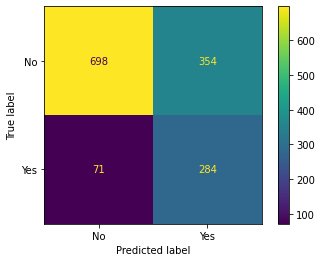

In [50]:
plot_confusion_matrix(logreg,scaled_X_test,y_test)

### Decision Tree Classification Algorithm

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [52]:
preds = dt.predict(X_test)

In [53]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1052
         Yes       0.63      0.40      0.49       355

    accuracy                           0.79      1407
   macro avg       0.72      0.66      0.68      1407
weighted avg       0.77      0.79      0.77      1407



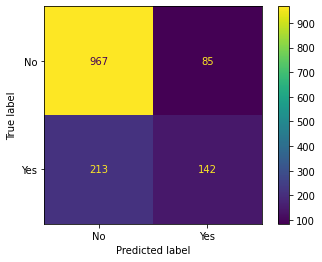

In [54]:
plot_confusion_matrix(dt,X_test,y_test)

In [55]:
param_grid_dt = {"criterion" : ["gini", "entropy"],
             "max_depth":[1,2,6,10,14,20],
             }

In [56]:
from sklearn.model_selection import GridSearchCV
grid_dt = GridSearchCV(estimator=dt,param_grid=param_grid_dt)

In [57]:
grid_dt.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=6),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 6, 10, 14, 20]})

In [58]:
grid_dt.best_params_

{'criterion': 'gini', 'max_depth': 2}

In [59]:
grid_dt_pre=grid_dt.predict(X_test)
confusion_matrix(y_test,grid_dt_pre)

array([[983,  69],
       [213, 142]], dtype=int64)

In [60]:
print(classification_report(y_test,grid_dt_pre))

              precision    recall  f1-score   support

          No       0.82      0.93      0.87      1052
         Yes       0.67      0.40      0.50       355

    accuracy                           0.80      1407
   macro avg       0.75      0.67      0.69      1407
weighted avg       0.78      0.80      0.78      1407



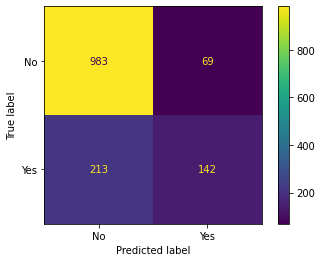

In [61]:
plot_confusion_matrix(grid_dt,X_test,y_test)

### Random Forest Algorithm

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(scaled_X_train,y_train)
preds = rf.predict(scaled_X_test)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.84      0.90      0.87      1052
         Yes       0.61      0.48      0.54       355

    accuracy                           0.79      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



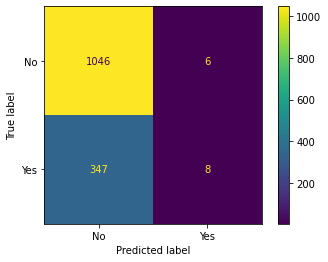

In [64]:
plot_confusion_matrix(rf,X_test,y_test)

In [65]:
param_grid_rf = {
             "n_estimators":[100,200,500,1000],
                'criterion': ['gini', 'entropy'],
                'max_depth': [1, 2, 6, 10, 14, 20]
                }

In [66]:
from sklearn.model_selection import GridSearchCV
grid_rf =GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid_rf)

In [67]:
grid_rf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 6, 10, 14, 20],
                         'n_estimators': [100, 200, 500, 1000]})

In [69]:
grid_rf.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 500}

In [70]:
grid_rf_pred=grid_rf.predict(X_test)

In [71]:
print(classification_report(y_test,grid_rf_pred))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1052
         Yes       0.66      0.51      0.58       355

    accuracy                           0.81      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



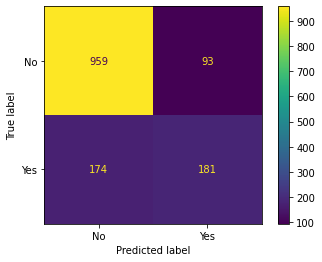

In [72]:
plot_confusion_matrix(grid_rf,X_test,y_test)

### FINDING AND SUMMARY

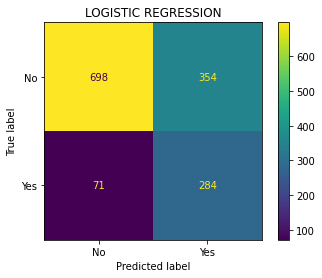

In [73]:
plot_confusion_matrix(logreg,scaled_X_test,y_test)
plt.title("LOGISTIC REGRESSION");

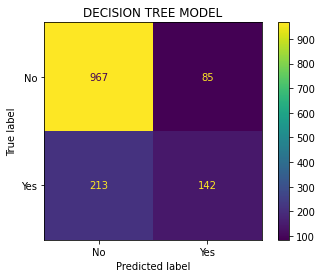

In [74]:
plot_confusion_matrix(dt,X_test,y_test)
plt.title("DECISION TREE MODEL");

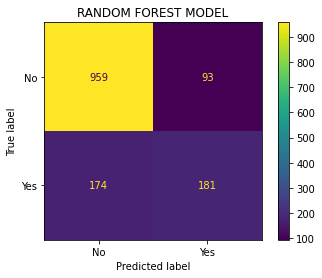

In [75]:
plot_confusion_matrix(grid_rf,X_test,y_test)
plt.title("RANDOM FOREST MODEL");

Clearly the logistic regression model are the best model here as they are the one who minimum miss classify the true_yes vs predicted_no.